### Module 5E - Disease Contamination

Written for AIFS.   
Copyright 2023 Tarek Zohdi, Emre Mengi, Omar Betancourt, Payton Goodrich. All rights reserved.

The pandemic of 2020 has led to a huge interest of modeling and simulation of infectious diseases. One of the central questions is the potential infection zone produced by a cough. In this assignment, you will develop mathematical models to simulate the progressive time-evolution of the distribution of particles in space produced by a cough. You will be asked that you recommend safe distancing guidelines based on the range, distribution and settling time of the particles under the influence of gravity and drag from the surrounding air.

<img src="cough.png" width="800" />

In [1]:
################################## Importing Packages ####################################################

from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import datetime
import pylab
from celluloid import Camera

### **Problem 1:** Theory-Based Exercises ###

Answer the following questions *prior* to coding the assignment to better understand the background physics and mathematics that govern the given models. You **may** solve these problems by hand **and/or** using computational tools such as *Python* etc. Please include all handwritten work and code used to solve each problem.

**Problem 1.1:** Given the particles are spherical with a random distribution of radii $R_i, i = 1, 2, 3, ..., N = \textit{particles}$ and the masses are given by $m_i = \rho_i \frac{4}{3}\pi R^3_i$, where $\rho_i$ is the density of the particles and is assumed to be constant for all droplets, the equation of motion for the ith particle in the system is
    
\begin{equation}
    m_i \ddot{\mathbf{r}}_i = \mathbf{\Psi}_i^{grav} + \mathbf{\Psi}_i^{drag}
\end{equation}
    
where $m_i$ is the mass of each droplet, $\mathbf{\ddot{r}}_i$ is the droplet's acceleration, and the two $\mathbf{\Psi}$ are gravitational and drag forces respectively.    

Let the $z$ axis be the vertical axis so we note that the gravitation force be defined as 

\begin{equation}
    \mathbf{\Psi}_i^{grav} = m_i (g_x, g_y, g_z) = (0, 0, -m_ig)
\end{equation}

where $g$ is the gravitational constant. The drag force depends on the geometry of the droplet and the properties of the surrounding medium:

\begin{equation}
    \mathbf{\Psi}_i^{drag} = \frac{1}{2}\rho_a C_D ||\mathbf{v}^f - \mathbf{v}_i|| (\mathbf{v}^f - \mathbf{v}_i) A_i
\end{equation}

where $C_D$ is the drag coefficient, $A_i$ is the reference area, which for a sphere is $A_i = \pi R^2_i$, $\rho_a$ is the density of the ambient fluid environment and $\mathbf{v}^f$ is the velocity of the surrounding medium, which in this case is air.
\\*

Solve for the acceleration of the particle and plug in the individual equations for $\mathbf{\Psi}_i^{grav}$, $\mathbf{\Psi}_i^{drag}$, and $m$.


**ANSWER:** Given

\begin{equation}
    \mathbf{\Psi}_i^{grav} = m_i (g_x, g_y, g_z) = (0, 0, -m_ig)
\end{equation}

\begin{equation}
    \mathbf{\Psi}_i^{drag} = \frac{1}{2}\rho_a C_D ||\mathbf{v}^f - \mathbf{v}_i|| (\mathbf{v}^f - \mathbf{v}_i) A_i
\end{equation}

\begin{equation}
    m_i \ddot{\mathbf{r}}_i = \mathbf{\Psi}_i^{grav} + \mathbf{\Psi}_i^{drag}
\end{equation}

\begin{equation}
    m_i = \rho_i \frac{4}{3}\pi R^3_i
\end{equation}

Then, 


\begin{equation}
    \ddot{\mathbf{r}}_i = \frac{1}{\rho_i \frac{4}{3}\pi R^3_i} \left(   m_i\mathbf{g} + \frac{1}{2}\rho_a C_D ||\mathbf{v}^f - \mathbf{v}_i|| (\mathbf{v}^f - \mathbf{v}_i) A_i  \right)
\end{equation}

**Problem 1.2:** To determine the drag coefficient, we first determine the Reynolds number of the droplet $Re$:

\begin{equation}
    Re = \frac{2 R \rho_a \Vert \bm{v}^f - \bm{v}_i \Vert}{\mu_f}
\end{equation}

Where $\mu_f$ is the viscosity of the surrounding medium. Then, the drag coefficient is a piecewise function of $Re$:

\begin{equation}
    C_{Di} = 
    \begin{cases}
    \frac{24}{Re}, & 0 < Re \leq 1 \\
    \frac{24}{Re^{0.646}}, & 1 < Re \leq 400 \\
    0.5, & 400 < Re \leq 3 \times 10^5 \\
    0.000366Re^{0.4275}, & 3 \times 10^5 < Re \leq 2 \times 10^6 \\
    0.18, & Re > 2 \times 10^6
    \end{cases}
\end{equation}

Given the variable glossary values, write the piece-wise drag coefficient in terms of particle velocity.

**ANSWER:** 

Given:

\begin{equation}    
    Re = \frac{2 R \rho_a \Vert \bm{v}^f - \bm{v}_i \Vert}{\mu_f}
\end{equation}

\begin{equation}
    Re = \frac{2(0.0001) (1.225) \Vert\bm{v}_i \Vert}{1.8e-5}
\end{equation}

\begin{equation}
    Re = 13.61\Vert\bm{v}_i \Vert
\end{equation}

\begin{equation}
    C_{Di} =     
    \begin{cases}
    \frac{24}{13.61\Vert\bm{v}_i \Vert}, & 0 < 13.61\Vert\bm{v}_i \Vert \leq 1 \\
    \frac{24}{(13.61\Vert\bm{v}_i \Vert)^{0.646}}, & 1 < 13.61\Vert\bm{v}_i \Vert \leq 400 \\
    0.5, & 400 < 13.61\Vert\bm{v}_i \Vert \leq 3 \times 10^5 \\
    0.000366(13.61\Vert\bm{v}_i \Vert)^{0.4275}, & 3 \times 10^5 < 13.61\Vert\bm{v}_i \Vert \leq 2 \times 10^6 \\
    0.18, & 13.61\Vert\bm{v}_i \Vert > 2 \times 10^6
    \end{cases}
\end{equation}

**Problem 1.3:** We have the governing equation for the motion of the droplets, which we will numerically integrate using the Forward Euler method. Write down the Forward Euler scheme to integrate and find the position and velocity of some $i$-th droplet.

**ANSWER:** 

\begin{equation}
    \bm r_i (t + \Delta t) = \bm r_i (t) + \Delta t \bm v_i (t)
\end{equation}

\begin{equation}
    \bm v_i (t + \Delta t) = \bm v_i (t) + \frac{\Delta t}{m_i} \mathbf{\Psi}_i^{grav}(t)
\end{equation}

### **Problem 2:** Coding Exercises ###  
Use the given python notebook template to complete the following coding exercises.

**Problem 2.1:** Define the constants used in the simulation. Use the variable glossary at the end of the assignment.

In [2]:
# ################################## Problem 2.1 ####################################################

#---------------- constants --------------------
r0 = np.array([0, 0, 2]).T      # starting height (m) #FILL IN HERE
g = np.array([0, 0, -9.81]).T   # gravity (m/s^2) #FILL IN HERE

t_tot = 4                        # simulation time (s) #FILL IN HERE
dt = 1e-4                       # time step (s) #FILL IN HERE
V0 = 30                         # magnitude of cough velocity (m / s) #FILL IN HERE
rho = 1000                      # density of particles (kg / m^3) #FILL IN HERE
mTot = 0.00005                   # total mass of droplets (kg) #FILL IN HERE

vf = np.array([0, 0, 0]).T      # surrounding fluid velocity (m/s) #FILL IN HERE
muf = 1.8e-5                    # surrounding fluid viscosity (Pa/s) #FILL IN HERE
rhoF = 1.225                    # density of air (kg / m^3) #FILL IN HERE

**Problem 2.2:** Let us assume the total mass of all of the droplets in a cough is $M^{total} = 0.00005kg$, with a  mean particle radius of $\bar{R} = 0.0001 m$ with variations according to 

\begin{equation}
    R_i = \bar{R} \times (1 + A \times \xi_i)
\end{equation}

where $A = 0.9975$ and a random variable $-1 \leq \xi_i \leq 1$. The algorithm used for particle generation should be:

-Initialize total mass: $M = 0$

-Start loop: $i=1,P_n$

-Compute a random deviation from the mean radius $\bar{R}$:  \quad $R_i = \bar{R} \times (1 + A \times \xi_i)$

-Compute the mass of the new particle and add to the total mass computed: \quad $M = M + m_i = M + \rho_i \frac{4}{3} \pi R^3_i$

-Check if the threshold for total mass has been reached: \quad If $M \geq M^{total}$ then stop (\textbf{determines $P_n =$ particles})

-End loop.

Initialize the particles size and mass randomly using the described algorithm.

In [3]:
# ################################## Problem 2.2 ####################################################

#---------------- particle generation --------------------
R_ave = 0.0001                  # average particle radius (m)
R = []                          # vector containing particle radii
Mtot = 0                        # track total number of particles
mi = []                         # mass of each particle (kg)
Aci = []                        # cross sectional area of each particle (m^2)
A = 0.9975                      # deviatiatoric constant
i = 0                           # index
counter = True                  # counter

while counter:
    xi = np.random.randint(low=-1000, high=1000, size=1)/1000;
    R.append(R_ave * (1 + A * xi))
    Mtot = Mtot + rho*(4/3)*np.pi*R[i]**3
    mi.append(rho*(4/3)*np.pi*R[i]**3)
    Aci.append(np.pi * R[i]**2)
    if Mtot >= mTot:
        counter = False
        pTot = i + 1
        print('Total # particles = ', pTot)
        print('rMin = ', np.amin(R))
        print('rMax = ', np.amax(R))
    else:
        i += 1
        

Aci = np.asarray(Aci)
R = np.asarray(R).T
mi = np.asarray(mi)

np.random.seed(10)
sample = np.random.choice(pTot, 1000, replace=False)     # select random particles to plot

Total # particles =  6005
rMin =  2.499999999999947e-07
rMax =  0.00019965025


**Problem 2.3:** The initial trajectories we determined from the following algorithm:


-Specify the relative direction of the cough: $\mathbf{N}^c = (N^c_x, N^c_y, N^c_z)$,

-For each particle, $i = 1, 2, 3, ..., P_n$, construct a (perturbed) trajectory vector:
    
\begin{equation}
    \mathbf{N}_i = (N^c_x + A^c_x \times \eta_{ix}, N^c_y + A^c_y \times \eta_{iy}, N^c_z + A^c_z \times \eta_{iz}), 
\end{equation}
    
where the random cone parameters are bounded: $-1 \leq \eta_{ix} \leq 1$, $0 \leq \eta_{iy} \leq 1$, $-1 \leq \eta_{iz} \leq 1$. 
    
-For each particle, normalize the trajectory vector:

\begin{equation}
    \mathbf{n}_i = \frac{1}{||\mathbf{N}_i||_2} (N_{ix}, N_{iy}, N_{iz}). 
\end{equation}
    
-For each particle, the velocity vector is constructed by a projection onto the normal vector:

\begin{equation}
    \mathbf{v}_i = V^c \mathbf{n}_i
\end{equation}

Initialize particle velocities using the described algorithm.

In [4]:
# ################################## Problem 2.3 ####################################################

# initial trajectories
Nc = np.array([0, 1., 0]).T     # direction of cough [x, y, z]
NPart = np.zeros((pTot, 3))     # perturbed direction for each particle [xi, yi, zi]
nPart = np.zeros((pTot, 3))     # normalized vector for each particle [nx, ny, nz]
Ac = np.array([1.0, 0.5, 1.]).T  # deviatoric constants [Ax, Ay, Az]


for i in range(pTot):
    eta = [np.random.randint(low=-1000, high=1000, size=1)/1000,
           np.random.randint(low=0, high=1000, size=1)/1000,
           np.random.randint(low=-1000, high=1000, size=1)/1000]

    NPart[i, 0] = Nc[0] + Ac[0]*eta[0]
    NPart[i, 1] = Nc[1] + Ac[1]*eta[1]
    NPart[i, 2] = Nc[2] + Ac[2]*eta[2]

    nMag = np.linalg.norm(NPart[i, :], 2)

    nPart[i, 0] = NPart[i, 0] / nMag
    nPart[i, 1] = NPart[i, 1] / nMag
    nPart[i, 2] = NPart[i, 2] / nMag

v0 = V0 * nPart

**Problem 2.4:** Run the simulator. The resulting video will be saved as 'animation.mp4' in the same directory as the notebook.

simulation finished
compiling video ...
____ compile complete ____


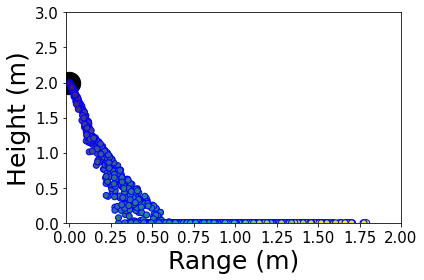

In [5]:
# ################################## Problem 2.4 ####################################################

#---------------- solution arrays --------------------
v0 = V0 * nPart
rSol = []
time_arr = []
tPlot = []
fig0 = plt.figure()
camera = Camera(fig0)
plot_R = R[0,sample]
# ---------------------------------------------
# ----------- Begin time stepping -------------
# ---------------------------------------------

ones = np.ones(pTot)
vi = v0
ri = np.outer(r0, ones).T
rSol.append(ri)
fGrav = np.outer(mi, g)

inAir = np.ones(len(ri[:,0]), dtype=bool)
timeFlight = np.zeros(len(inAir))

t_step = 0
time_arr.append(t_step)

i = 0; ii = 0
while np.any(inAir):
#     if i % 10 == 0:
#         print('time = ', t_step)
    if t_step > t_tot:
        print("simulation finished")
        break

    Cd = np.zeros(pTot)
    
    # compute forces
    vdiff = np.linalg.norm(vf - vi, 2, 1)

    Re = (2 * R * rhoF * vdiff / muf).T
    cond1 = np.where(np.logical_and(Re > 0, Re <= 1.0))[0]
    cond2 = np.where(np.logical_and(Re > 1.0, Re <= 400))[0]
    cond3 = np.where(np.logical_and(Re > 400, Re <= 3e5))[0]
    cond4 = np.where(np.logical_and(Re > 3e5, Re <= 2e6))[0]
    cond5 = np.where(np.logical_and(Re > 2e6, Re > 1.0))[0]
        
    if len(cond1) > 0:
        Cd[cond1] = 24. / np.squeeze(Re[cond1])
    if len(cond2) > 0:
        Cd[cond2] = 24. / np.squeeze(np.power(Re[cond2], 0.646))
    if len(cond3) > 0:
        Cd[cond3] = 0.5
    if len(cond4) > 0:
        Cd[cond4] = 0.000366 * np.squeeze(np.power(Re[cond4], 0.4275))
    if len(cond5) > 0:
        Cd[cond5] = 0.18
    
    # https://stackoverflow.com/questions/18522216/multiplying-across-in-a-numpy-array
    dragC = np.array([(Cd * np.squeeze(Aci) * vdiff), 
                      (Cd * np.squeeze(Aci) * vdiff), 
                      (Cd * np.squeeze(Aci) * vdiff)]).T
    fDrag = 1/2 * rhoF * dragC * (vf - vi)
    fTot = fDrag + fGrav
    

    ri[inAir,:] = ri[inAir,:] + dt*vi[inAir,:]
    vi[inAir,:] = vi[inAir,:] + dt*(fTot[inAir,:] / mi[inAir])

    contactSubstrate = np.where(ri[:, 2] <= 0)
    inAir[contactSubstrate] = False
    ri[contactSubstrate, 2] = 0
    rSol.append(ri.copy())

    # ------------ animate ------------
    if i % 400 == 0:
#         plt.figure(figsize=(10,7.5))
        x2d = ri[sample,1]
        y2d = ri[sample,2]
        plt.scatter(r0[1], r0[2], color='k', s=500)
        plt.scatter(x2d, y2d, c=plot_R, cmap='viridis', edgecolors='b')
        plt.xlim(-0.02, 2)
        plt.ylim(0, 3)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        plt.xlabel('Range (m)', fontsize=25)
        plt.ylabel('Height (m)', fontsize=25)
        plt.tight_layout()
        camera.snap()       
        
        
    

        
    t_step += dt
    time_arr.append(t_step)
    i += 1
      

# --------------------------------------------
print('compiling video ...')
animation = camera.animate()
animation.save('animation.mp4')
print('____ compile complete ____')

### **Problem 3:** Analyzing Your Results ###  
Answer the following questions about the code you created.

**Problem 3.1:** Report approximately how far the particles landed from the starting point. Does the simulation agree with the prescribed '6-feet' social distancing recommendation from authorities?

**ANSWER:**

<img src="range_cough.png" width="400" />

The particles landed approximately 1.5 meters from the starting point. This is around 5 feet, which is close to the 6 feet social distancing recommendation. However, any air currents or wind could have affected the particles' trajectories, so the particles could have landed further away from the starting point. In addition, we see that the smaller particles remained in the air for a longer time, which would be dangerous for any person moving through the cloud of particles at a later time.

**Problem 3.2:** Knowing the particle size range used in the simulation, what percentage of the particles contaminating the air can be captured by a standard N95 mask? 

**ANSWER:** The average size of the particles is 0.0001 meters. The N95 mask can filter out particles that are 0.3 microns or larger. This means that the N95 mask can filter out 99.9% of the particles in the simulation. This proves that wearing a mask is an effective way to prevent the spread of COVID-19.

**Problem 3.3:** Include a series of plots showing how the cough particles spread. Include 6 approximately evenly-spaced frames from $t = 0$ until the final time for your system. The following code snippet will save 6 frames from your simulation.

In [ ]:
################################# Plotting Best Solution Animation ###############################################################

tSol = np.array([0.1, 0.25, 0.5, 1.0, 2.0, 4.0])

ti = []
for i in range(len(tSol)):
    ti.append(np.where(abs(time_arr - tSol[i]) < 1e-6)[0][0])  # retrieve indices containing desired times
    
print(ti)

for j in range(len(ti)):
    print('--- plotting time {}s'.format(ti[j]))
    plot_sol = rSol[ti[j]]
    fig = plt.figure(figsize = (15, 10))
    ax = plt.axes(projection='3d')
    ax.scatter3D(r0[0], r0[1], r0[2], c='k', marker='o', s=500)
    output_fig = ax.scatter3D(plot_sol[sample, 0], plot_sol[sample, 1], plot_sol[sample, 2], 
                              marker='o', s=50, c=plot_R, edgecolor='grey')
    cbar = plt.colorbar(output_fig, shrink=0.5, pad=-.125)
    cbar.set_label('Particle radius (m)', fontsize=15)
    ax.set_title('Droplets from Cough at Time = {}s'.format(ti[j]/10000), y = 1.08, fontsize=25)
    ax.set_xlabel('X Axis')
    ax.set_ylabel('Y Axis')
    ax.set_zlabel('Z Axis')
    ax.set_xlim(-0.02, 2)
    ax.set_ylim(-0.02, 2)
    ax.set_zlim(0, 3)
    ax.tick_params(axis='x', which='major', pad=2000)
    ax.tick_params(axis='y', which='major', pad=2000)
    ax.view_init(5, 15)

    label = pylab.annotate("Source", 
                            xy = (r0[1], r0[2]), xytext = (1, 2),
                            textcoords = 'offset points', ha = 'right', va = 'bottom',
                            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
                            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
    plt.savefig('cough_t{}.png'.format(ti[j]/10000))

Use the following variable glossary to fill in the required variables.

<img src="VariableGlossary.png" width="800" />